In [1]:
# This is a cell to hide all Code cells that has the string "hide_this_cell" from displaying
# This code must be inserted into the first cell to work properly

from IPython.display import HTML, display, Image

hide_this_cell = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_this_cell') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input style="opacity:0.2" type="submit" value="Show/hide the code running under the hood">
</form>''')

In [2]:
# This cell is used for importing essential libraries that is not used to understand Qiskit and is therefore hidden
hide_this_cell

from IPython.display import clear_output, Markdown, HTML
from IPython.core.display import SVG, HTML, Image
from ipywidgets import widgets

# Everything you need to know about The Deutsch–Jozsa algorithm
## Intro (Skal laves lidt om, da det er Deutsch-Jozsa og ikke kun Deutsch)
During the beginning of the 20th century, Alan Turing created the foundation to so much of computer science, making it hard to do anything with computers that isn't some way influenced by his work. The same applies to David Deutsch, who in 1985 considered computing devices based upon the principles of quantum mechanics, which ultimately led us to the modern conception of a quantum computer[QC-6].

This remarkable first step taken by Deutsch was improved in the subsequent decade by many people, culminating in a list of quantum algorithms, where the majority of these may provide exponential speedup over their classical counterparts and the others, like Grover's algorithm, _may only_ provide a quadratic speedup[QC-38].

It is a fun fact to know - but knowing is not as awesome as trying it yourself, hence why we will go forth with diving into the first _problem_ Deutsch created an algorithm for, which the quantum computer can solve faster than a traditional computer, although not exponentially faster.

The problem that Deutsch's algorithm solves is not an important problem in Computer Science. However, it is a great beginners problem to see how quantum computers can be used and it is presented here with that purpose. _If you are familiar with programming, you can see this as your “hello world” ;-)._

---
## Classical prerequisite knowledge  (Stuff you need to know for it to make sense)
#### Bits and operations
Given you have a *single bit*, the traditional logic considers this bit either of two values: True $(1)$ or False $(0)$.<br>

There are four different bitwise operations which can be used to manipulate this bit. For an example, _negation_ is one of the four operations, which is an operation on one logical value that switches the value to the opposite value e.g. from False $(0)$ to True $(1)$. 

All four of the operationens and the way they operate on a logical value can be seen on the picture below: 

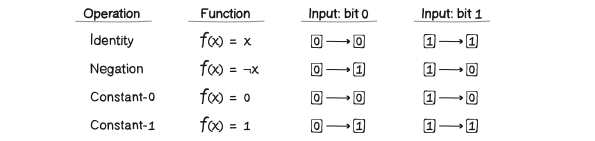

In [3]:
hide_this_cell
SVG(filename='../images/deutsch/ClassicInput2.svg')

#### Two types of functions
Another piece of information to understand is that the the functions for the abovementioned operations are either _balanced_ or _constant_.<br>
A _balanced_ function is if its output is 0 half the time and 1 the other half (Identity and Negation).<br>
A _constant_ function is if its output is a constant (1 or 0) regardless of the input (Constant-0 and Constant-1). 

#### Reversible Computing
And the last piece of information to wrap your head around is a principle of reversible computing. <br>
It basically means that if I tell you which operation I use and the output of that operation, you will always be able to tell the input of that operation.<br> 
There is a lot more to it, but the most important principle to understand is that reversible operations can be reversed, or undone.<br><br>

<strong style="color: orange;">Question 1:</strong> Now, take a moment to think: which of the four operations seen on the picture above are reversible and which are not reversible?

In [4]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear1 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)

def handleClickDisappear1(b):
    clear_output()
    display(Markdown('''Operations which permute **are** reversible:<br>
                         <span>&#8627;</span>  Identity and negation are therefore reversible.<br><br>
                        Operations which erase and overwrite **are not** reversible:<br>
                         <span>&#8627;</span>   Constant-0 and Constant-1 are therefore not reversible.<br>
                        <div class="alert alert-block alert-warning">
                        <b>Important info:</b> Quantum Computers only use reversible operations - as all quantum operators are their own inverses.<br>
                        Therefore, if you apply the same quantum operation twice, it will have the same state as it had initially. <br>
                        </div>'''))

buttonDisappear1.on_click(handleClickDisappear1)

display(buttonDisappear1)

Button(description='Reveal the answer', style=ButtonStyle(), tooltip='The button will disappear when pressed a…

---
## The Oracle 
The old greeks say that an Oracle is an object containing mysterious answers to life's question, which in this context is simply an answer to which function it is hiding. Hence we can't see what is inside the Oracle, it can and will be regarded as a "black box".

Now, imagine someone gives this "black box" to you as seen below and all you can do is supply it with inputs $|x>$ and receive outputs $f(|x>)$.

In [5]:
hide_this_cell
SVG(filename='../images/deutsch/ClassicBlackBox.svg')

<strong style="color: orange;">Question 2:</strong> Based on the four functions mentioned on the first picture - How many different input will you have to send through the black box to determine the function inside the black box on a **classical** computer?

In [6]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear2 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)

def handleClickDisappear2(b):
    clear_output()
    display(Markdown('**Answer: Two** - By sending in a one and a zero, their output uniquely identifies which function it is'))
    
buttonDisappear2.on_click(handleClickDisappear2)

display(buttonDisappear2)

Button(description='Reveal the answer', style=ButtonStyle(), tooltip='The button will disappear when pressed a…

<strong style="color: orange;">Question 3:</strong> Based on your intuition and your collected knowledge about quantum computers - How many different input will you have to send through the black box to determine the function inside the black box on a **quantum** computer?

In [7]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear3 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)

def handleClickDisappear3(b):
    clear_output()
    display(Markdown('**_Trick question_ - Answer: Two** - When the Qubit has been sent through the Black Box, it still collapses to a single bit of information, so to uniquely identify which function that has been used on the qubit, we still need to send through two different inputs (1 and 0)'))
    
buttonDisappear3.on_click(handleClickDisappear3)

display(buttonDisappear3)

Button(description='Reveal the answer', style=ButtonStyle(), tooltip='The button will disappear when pressed a…

<strong style="color: orange;">Question 4:</strong> What if we, instead of trying to determine which function is inside the oracle, want to determine whether the function is _balanced_ or _constant_. How many input will you have to send through the black box **classical** computer to figure that out?

In [8]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear4 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)

def handleClickDisappear4(b):
    clear_output()
    display(Markdown('''**Answer: Two different input**<br>
                     If we send a 1 bit through and get 1 out, we can't be sure if it's identity or constant-1.<br>
                     If we send a 1 bit through and get 0 out, we can't be sure if it's negation or constant-0.<br>
                     Hence why we need to send it through twice to determine this as well.
                     '''))

buttonDisappear4.on_click(handleClickDisappear4)

display(buttonDisappear4)

Button(description='Reveal the answer', style=ButtonStyle(), tooltip='The button will disappear when pressed a…

<strong style="color: orange;">Question 5:</strong> And the same structure again as before - The same question for a classical computer and a quantum computer: How many input will you have to send through the black box to determine whether the function is _balanced_ or _constant_ inside the black box on a **quantum** computer?

**Answer: One single input being either 0 or 1!**
                        <div class="alert alert-block alert-warning">
                        <b>important info:</b> It is an undeniable fact that this outperforms a classical computer.<br>
                        We can achieve this by taking advantage of Superposition - With that, we can use more than the limitation of two states we know from classical computing, which, for the purpose of understanding it, has been super simplified in the picture below. 
                        </div>

Button(description='Superposition Bloch', style=ButtonStyle())

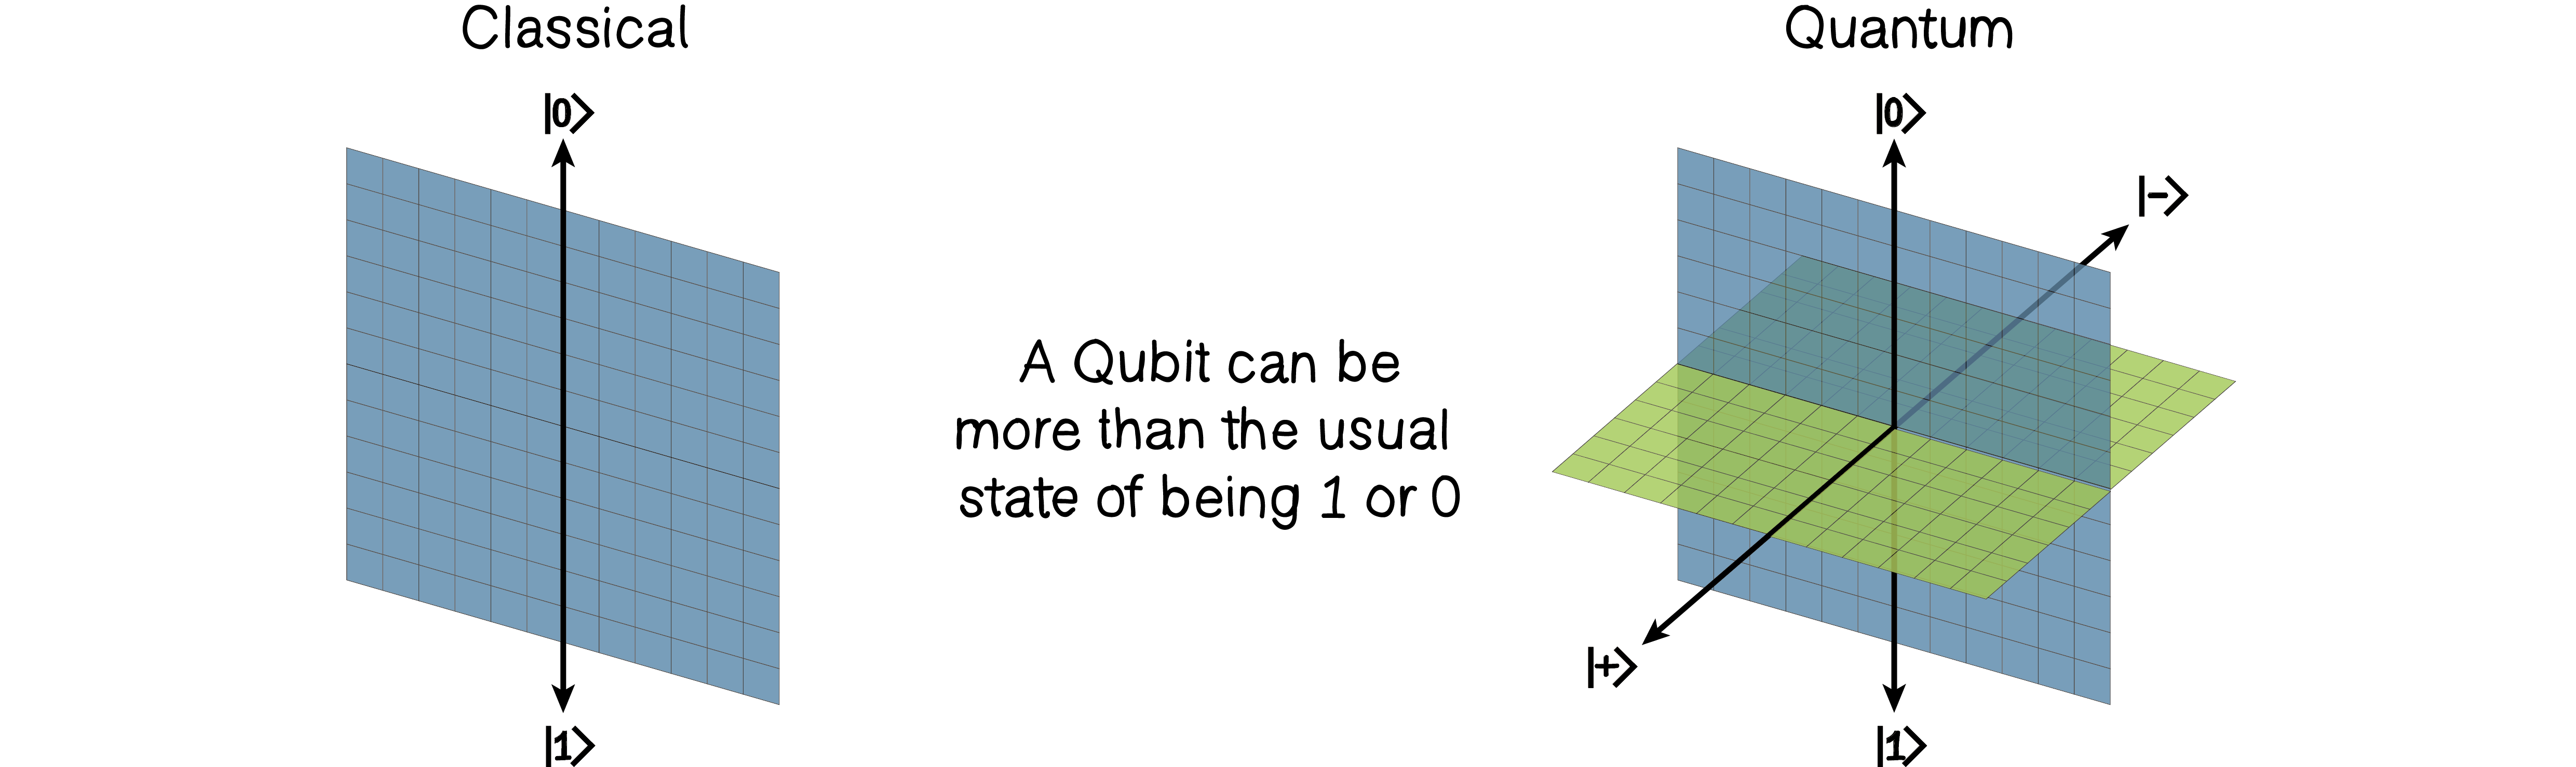

In [9]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear5 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)
buttonShowBloch1 = widgets.Button(description='Superposition Bloch', disabled=False)
buttonShowGraph1 = widgets.Button(description='Superposition Graph', disabled=False)

def handleClickDisappear5(b):
    clear_output()
    display(Markdown('''**Answer: One single input being either 0 or 1!**
                        <div class="alert alert-block alert-warning">
                        <b>important info:</b> It is an undeniable fact that this outperforms a classical computer.<br>
                        We can achieve this by taking advantage of Superposition - With that, we can use more than the limitation of two states we know from classical computing, which, for the purpose of understanding it, has been super simplified in the picture below. 
                        </div>'''))
    display(buttonShowBloch1)
    
def handleShowBloch1(b):
    clear_output()
    display(Markdown('''**Answer: One single input being either 0 or 1!**
                        <div class="alert alert-block alert-warning">
                        <b>important info:</b> It is an undeniable fact that this outperforms a classical computer.<br>
                        We can achieve this by taking advantage of Superposition - With that, we can use more than the limitation of two states we know from classical computing, which, for the purpose of understanding it, has been super simplified in the picture below. 
                        </div>'''))
    display(buttonShowGraph1)
    display(Image(filename = "../images/deutsch/StateBloch.png"))


def handleShowGraph1(b):
    clear_output()
    display(Markdown('''**Answer: One single input being either 0 or 1!**
                        <div class="alert alert-block alert-warning">
                        <b>important info:</b> It is an undeniable fact that this outperforms a classical computer.<br>
                        We can achieve this by taking advantage of Superposition - With that, we can use more than the limitation of two states we know from classical computing, which, for the purpose of understanding it, has been super simplified in the picture below. 
                        </div>'''))
    display(buttonShowBloch1)
    display(Image(filename = "../images/deutsch/StateGraph.png"))
    

buttonDisappear5.on_click(handleClickDisappear5)
buttonShowBloch1.on_click(handleShowBloch1)
buttonShowGraph1.on_click(handleShowGraph1)

display(buttonDisappear5)

---
# The Oracle in a Quantum Context

#### The operations in quantum

- Identity

- Negation

- Constant-0

- Constant-1

- Make the functions yourself - Tasks
-- Massere af opgaver med Qiskit, import, lav circuit osv. osv. osv.

#### The full Quantum Deutsch Oracle

- Show the full algorithm

- Answer which function is the right one for the following oracles



---
# TRASH BELOW
## Quantum Operators (And tasks)

Operations which permute are reversible;<br>
-- Identity and negation are reversible<br><br>
Operations which erase and overwrite are not<br>
--  Constant-0 and Constant-1 are not reversible<br>

#TODO <br>

For reversible operations, given the operation $A$ and output value $b$, you can always find the input value $x$.<br>
>$
\begin{align}
A \cdot x = b
\end{align}
$


Operations which permute are reversible;<br>
-- Identity and negation are reversible<br>
Operations which erase and overwrite are not<br>
--  Constant-0 and Constant-1 are not reversible<br>
Quantum computers use only revserible operations, so we will only care about those<br>
--  In fact, all quantum operators are their own inverses<br>


Quantum computers use only revserible operations, so we will only care about those<br>
--  In fact, all quantum operators are their own inverses<br>
### Questions

imagine someone gives you a black box containing one of the functions illustrated above on one bit<br>
you don't know which function is inside the box, but you can try inputs and see outputs<br>

In [10]:
hide_this_cell

buttonShow = widgets.Button(description='Show answer', tooltip='Click me to show the answer')
buttonHide = widgets.Button(description='Hide answer', tooltip='Click me to hide the answer')

def handleClickShow(b):
    clear_output()
    display(buttonHide)
    display(Markdown('*Her er markdown* - Markdown med LaTeX $\phi$'))
    display(Markdown('<center> Her har vi LaTeX centreret $\phi$ med tekst</center>'))
    
def handleClickHide(b):
    clear_output()
    display(buttonShow)
    
buttonShow.on_click(handleClickShow)
buttonHide.on_click(handleClickHide)



display(buttonShow)

Button(description='Show answer', style=ButtonStyle(), tooltip='Click me to show the answer')

In [11]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)

def handleClickDisappear(b):
    clear_output()
    display(Markdown('*Her er markdown* - Markdown med LaTeX $\phi$'))
    display(Markdown('<center> Her har vi LaTeX centreret $\phi$ med tekst</center>'))
    print("Money In The Bank")

    
buttonDisappear.on_click(handleClickDisappear)

display(buttonDisappear)

Button(description='Reveal the answer', style=ButtonStyle(), tooltip='The button will disappear when pressed a…

In [12]:
# This is the same cell as seen at the beginning to hide code snippets from displaying
# This must be the last cell in the jupyter notebook!

hide_this_cell = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_this_cell') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
</script>''');